In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
spam_df = pd.read_csv('emails.csv')

In [6]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
spam_df.shape

(5728, 2)

In [9]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [11]:
# Data Exploration
ham = spam_df[spam_df['spam'] == 0]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam = spam_df[spam_df['spam'] == 1]

In [14]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [15]:
print('Spam Percent',(len(spam)/len(spam_df)*100,'%'))

Spam Percent (23.88268156424581, '%')


In [16]:
print('Ham Percent',(len(ham)/len(spam_df)*100,'%'))

Ham Percent (76.11731843575419, '%')


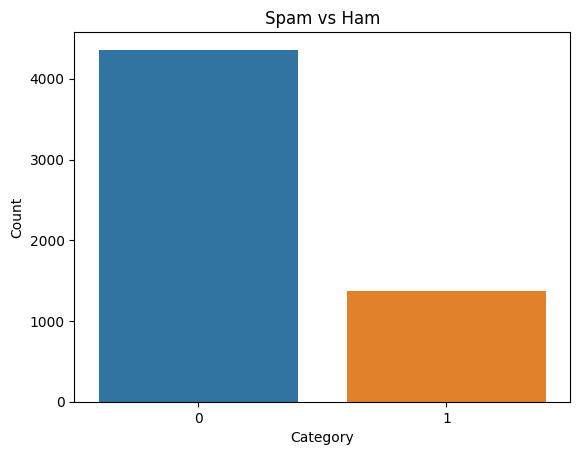

In [17]:
sns.countplot(data=spam_df, x='spam')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs Ham')
plt.show()

In [18]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
sample_data = ['This is the first document','Thank you for your interest','First order is placed','These are sample examples']

sample_vectorizer = CountVectorizer()

In [20]:
X = sample_vectorizer.fit_transform(sample_data)

In [21]:
print(X.toarray())

[[0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0]]


In [22]:
feature_names = sample_vectorizer.get_feature_names_out()
print(feature_names)

['are' 'document' 'examples' 'first' 'for' 'interest' 'is' 'order'
 'placed' 'sample' 'thank' 'the' 'these' 'this' 'you' 'your']


In [23]:
# Apply count vectorizer to our spam and ham examples
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [24]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [25]:
print(spamham_countvectorizer)

  (0, 32371)	1
  (0, 23381)	1
  (0, 18838)	1
  (0, 37024)	7
  (0, 10045)	1
  (0, 17688)	1
  (0, 21148)	1
  (0, 18848)	3
  (0, 28018)	1
  (0, 16655)	1
  (0, 33798)	4
  (0, 28142)	1
  (0, 9281)	3
  (0, 33450)	5
  (0, 21665)	2
  (0, 15415)	1
  (0, 24274)	4
  (0, 32635)	1
  (0, 4836)	5
  (0, 18234)	1
  (0, 18885)	1
  (0, 7546)	2
  (0, 16072)	2
  (0, 8043)	1
  (0, 20960)	3
  :	:
  (5727, 24851)	2
  (5727, 21635)	1
  (5727, 5715)	9
  (5727, 30968)	1
  (5727, 2807)	3
  (5727, 13324)	1
  (5727, 13113)	1
  (5727, 17380)	1
  (5727, 14115)	1
  (5727, 20276)	1
  (5727, 31860)	1
  (5727, 13114)	1
  (5727, 20470)	1
  (5727, 35337)	1
  (5727, 8614)	1
  (5727, 30116)	1
  (5727, 13507)	5
  (5727, 36243)	1
  (5727, 943)	2
  (5727, 2776)	1
  (5727, 30316)	1
  (5727, 17582)	1
  (5727, 33970)	1
  (5727, 10354)	1
  (5727, 11368)	1


In [26]:
spamham_countvectorizer.shape

(5728, 37303)

In [27]:
# Training the Model
label = spam_df['spam'].values

In [28]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer,label)

MultinomialNB()

In [30]:
testing_sample = ['Free money!!!', 'Hi Key, Please let me know if you need any further information']

In [31]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [32]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [33]:
X = spamham_countvectorizer
y = label

In [34]:
X.shape

(5728, 37303)

In [35]:
y.shape

(5728,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [38]:
# Evaluating the Model
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 1, 0, ..., 0, 0, 0])

<Axes: >

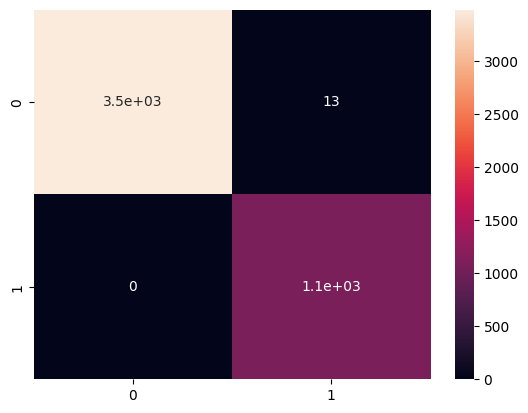

In [40]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

<Axes: >

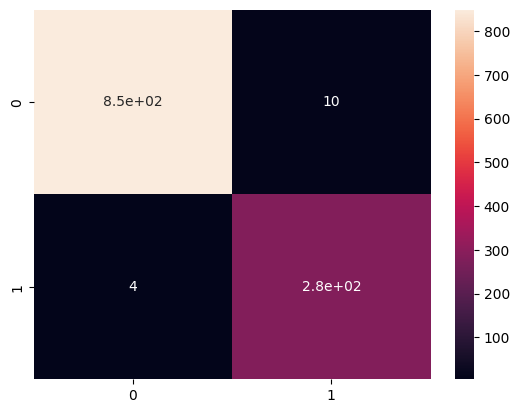

In [41]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [42]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       859
           1       0.97      0.99      0.98       287

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

